In [1]:
#import Libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\User\AppData\Local\Temp\ipykernel_13620\610210417.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


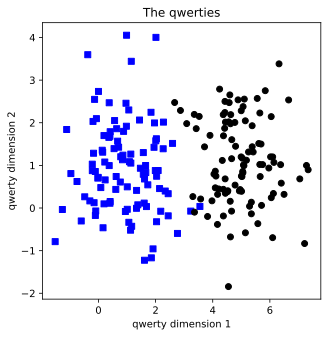

In [4]:
#create data 
nPerClust = 100
blur = 1

A=[1,1]
B=[5,1]

#generate data
a=[A[0]+np.random.randn(nPerClust)*blur,A[1]+np.random.randn(nPerClust)*blur ]
b=[B[0]+np.random.randn(nPerClust)*blur,B[1]+np.random.randn(nPerClust)*blur ]

#true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

#concatenate into a matrix
data_np = np.hstack((a,b)).T

#Convert to a pytorch tensor 
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [5]:
def createANNmodel(learningRate):

    #model architecture
    ANNclassify = nn.Sequential(
        nn.Linear(2,1),
        nn.ReLU(),
        nn.Linear(1,1)

    )


    #loss function
    lossfun = nn.BCEWithLogitsLoss()

    #optimizer
    optimizer = torch.optim.sgd(ANNclassify.parameters(),lr=learningRate)

    #model output
    return ANNclassify,lossfun,optimizer

In [6]:
def traintheModel(ANNmodel):

    numepochs = 1000
    losses = torch.zeros(numepochs)

    
    #initialize losses
    losses = torch.zeros(numepochs)

    #loop over epochs
    for epochi in range(numepochs):

        #forward pass
        yHat= ANNmodel(data)

        #compute loss
        loss = lossfun(yHat,labels)
        losses[epochi]=loss

        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    #final forward pass
    predictions = ANNmodel(data)

    #compute the predictions and report accuracy
    #Note: shouldn't it be predictions>.5??
    totalacc = 100*torch.mean(((predictions>0)==labels).float())

    return losses,predictions,totalacc


<h1>Test the new code by running it once